# On Windows 10/11

## Installing WSL

To install Windows Subsystem for Linux (WSL):

1. Go to Control Panel
2. Change View By to "Category"
3. Go to Programs
4. Go to Turn Windows features on or off
5. Check Windows Subsystem For Linux and click Ok
6. Restart your computer
7. Go to Microsoft Store
8. Search for "Ubuntu"
9. Click on the first search result
10. Click on Get or Install
11. Open Ubuntu
12. Wait for installation and choose username and password
13. Done!

## Creating a directory on C:\

The following command will create a folder called "Agri-Plast" on C:\ 

In [ ]:
import subprocess
subprocess.run('wsl bash -c "mkdir /mnt/c/Agri-Plast"', shell=True, check=True)

## Downloading metadata file

In this tutorial, we will be focusing on the following dataset:
https://dmportal.biodata.pt/dataset.xhtml?persistentId=doi:10.34636/DMPortal/AWYIXC

From this link we should take note of the doi:

And replace on the the doi variable on the following command:

In [ ]:
doi = "doi:10.34636/DMPortal/AWYIXC"
subprocess.run(f'wsl bash -c "curl -L \\"https://dmportal.biodata.pt/api/datasets/:persistentId/?persistentId={doi}\\" -o /mnt/c/Agri-Plast/dataset.metadata"', shell=True, check=True)

## Obtaining File IDs

To obtain each file IDs from each dataset:
1. Open dataset.metadata
2. Search for:

3. Take note of the numbers following that search term. Next to it you have "filename": followed by the name of the file.

## Downloading dataset files

In the case of the dataset presented here, the IDs of the two files are 1228 and 1229.

To download each file, replace id by the desired one on the following command:

In [ ]:
id = "1229"
import subprocess
subprocess.run(f'wsl bash -c "curl -L \\"https://dmportal.biodata.pt/api/access/datafile/{id}?format=original\\" -o /mnt/c/Agri-Plast/file_{id}.csv"', shell=True, check=True)

## Inspecting the file

In [6]:
import pandas as pd
dataset = pd.read_csv("C:\\Agri-Plast\\file_1229.csv")
print(dataset)

            Date      Time  Temperature (°C)  Humidity (%HR)
0     27/06/2024  11:27:00              31.6            92.8
1     27/06/2024  11:42:00              36.6            43.7
2     27/06/2024  11:57:00              38.1            41.4
3     27/06/2024  12:12:00              38.4            39.7
4     27/06/2024  12:27:00              38.8            39.5
...          ...       ...               ...             ...
7995  18/09/2024  18:12:00              26.2            60.5
7996  18/09/2024  18:27:00              26.0            63.2
7997  18/09/2024  18:42:00              25.8            65.7
7998  18/09/2024  18:57:00              25.5            66.5
7999  18/09/2024  19:12:00              25.3            67.3

[8000 rows x 4 columns]


## Plotting data

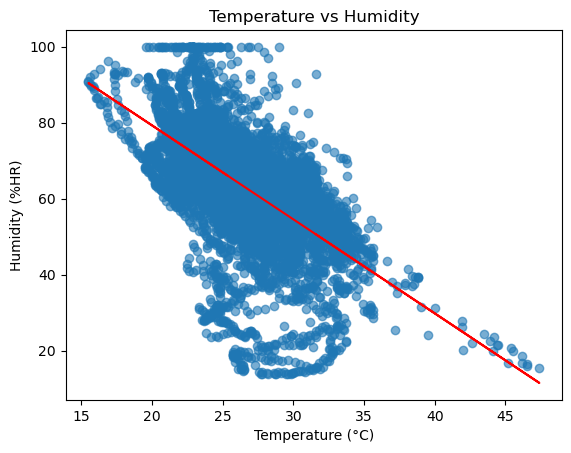

y =-2.471288951824853*x + 128.68938924684124


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataset = pd.read_csv("C:\\Agri-Plast\\file_1229.csv")
dataset_clean = dataset.dropna(subset=["Temperature (°C)", "Humidity (%HR)"])

x = dataset_clean["Temperature (°C)"]
y = dataset_clean["Humidity (%HR)"]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

plt.scatter(dataset_clean["Temperature (°C)"], dataset_clean["Humidity (%HR)"], alpha=0.6)
plt.plot(x, regression_line, color="red")

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%HR)")
plt.title("Temperature vs Humidity")
plt.savefig("C:\\Agri-Plast\\plot_reg.png")
plt.show()
print("y ="+str(slope)+"*x"+" + " + str(intercept))